In [6]:
from kmeans_experiment import KMeansExperiment
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [7]:
# iris = datasets.load_iris()
# X = iris.data

X = pd.read_csv('housing.csv')
X = X.drop(['ocean_proximity'], axis=1)
X = X.dropna()

# wine = datasets.load_wine()
# X = wine.data

# diabetes = datasets.load_diabetes()
# X = diabetes.data

In [8]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)
X_T = pca.transform(X)

In [9]:
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
qt = QuantileTransformer(n_quantiles=10, random_state=0)
X_T_norm = qt.fit_transform(X_T)

X_T_norm.shape

(20433, 2)

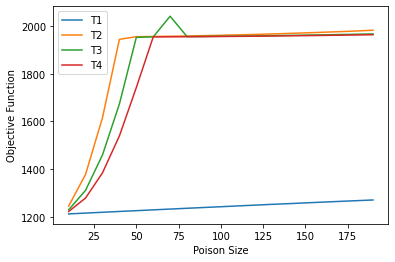

In [10]:
t_1 = KMeansExperiment(X_T_norm, k=3)
t_2 = KMeansExperiment(X_T_norm, k=3)
t_3 = KMeansExperiment(X_T_norm, k=3)
t_4 = KMeansExperiment(X_T_norm, k=3)

t_2.add_t_furthest_points(2)
t_3.add_t_furthest_points(3)
t_4.add_t_furthest_points(4)

t_1.add_poison_point(200, step=10)
t_2.add_poison_point(200, step=10, split=True)
t_3.add_poison_point(200, step=10, split=True)
t_4.add_poison_point(200, step=10, split=True)

df_point_1 = pd.DataFrame(t_1.get_poison_vs_objective(), columns = ['Poison Size','Objective Function'])
df_point_2 = pd.DataFrame(t_2.get_poison_vs_objective(), columns = ['Poison Size','Objective Function'])
df_point_3 = pd.DataFrame(t_3.get_poison_vs_objective(), columns = ['Poison Size','Objective Function'])
df_point_4 = pd.DataFrame(t_4.get_poison_vs_objective(), columns = ['Poison Size','Objective Function'])

a = np.stack((df_point_1['Poison Size'].values.astype(float),  df_point_1['Objective Function'].values.astype(float)), axis=-1)
b = np.stack((df_point_2['Poison Size'].values.astype(float),  df_point_2['Objective Function'].values.astype(float)), axis=-1)
c = np.stack((df_point_3['Poison Size'].values.astype(float),  df_point_3['Objective Function'].values.astype(float)), axis=-1)
d = np.stack((df_point_4['Poison Size'].values.astype(float),  df_point_4['Objective Function'].values.astype(float)), axis=-1)

qt_a = QuantileTransformer(n_quantiles=10, random_state=0)
a_norm = qt.fit_transform(a)
qt_b = QuantileTransformer(n_quantiles=10, random_state=0)
b_norm = qt.fit_transform(b)
qt_c = QuantileTransformer(n_quantiles=10, random_state=0)
c_norm = qt.fit_transform(c)
qt_d = QuantileTransformer(n_quantiles=10, random_state=0)
d_norm = qt.fit_transform(d)

# plt.title(f"Iris data X_shape={X_T_norm.shape}, {m} poison, K={test_k}, step={s}")
# plot lines
# plt.figure(figsize=(15,10))
plt.plot(a[:,0], a[:,1], label = "T1")            # linestyle="-.")
plt.plot(b[:,0], b[:,1], label = "T2")     
plt.plot(c[:,0], c[:,1], label = "T3")     
plt.plot(d[:,0], d[:,1], label = "T4")     
plt.legend()
# plt.xticks(np.arange(0, df_line['Poison Size'].max(), 100))
# plt.yticks(np.arange(0, len(df_line['Objective Function'])+1, 5))
plt.xlabel('Poison Size')
plt.ylabel('Objective Function')
plt.show()